In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
df=pd.read_csv('Suicides in India 2001-2012.csv')
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [3]:
df.shape

(237519, 7)

In [4]:
df.isnull().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [6]:
df.describe()

,Year,Total
count,237519.000000,237519.000000
mean,2006.500448,55.034477
std,3.452240,792.749038
min,2001.000000,0.000000
25%,2004.000000,0.000000
50%,2007.000000,0.000000
75%,2010.000000,6.000000
max,2012.000000,63343.000000


In [7]:
df['Type'].unique()

array(['Illness (Aids/STD)', 'Bankruptcy or Sudden change in Economic',
       'Cancellation/Non-Settlement of Marriage',
       'Physical Abuse (Rape/Incest Etc.)', 'Dowry Dispute',
       'Family Problems', 'Ideological Causes/Hero Worshipping',
       'Other Prolonged Illness', 'Property Dispute',
       'Fall in Social Reputation', 'Illegitimate Pregnancy',
       'Failure in Examination', 'Insanity/Mental Illness',
       'Love Affairs', 'Professional/Career Problem', 'Divorce',
       'Drug Abuse/Addiction', 'Not having Children(Barrenness/Impotency',
       'Causes Not known', 'Unemployment',
       'Other Causes (Please Specity)', 'Poverty', 'Death of Dear Person',
       'Cancer', 'Suspected/Illicit Relation', 'Paralysis', 'Diploma',
       'No Education', 'Post Graduate and Above', 'Middle', 'Graduate',
       'Hr. Secondary/Intermediate/Pre-Universit', 'Primary',
       'Matriculate/Secondary', 'By Consuming Insecticides', 'By Hanging',
       'By Jumping from (Other sites)'

<Axes: xlabel='State', ylabel='Total'>

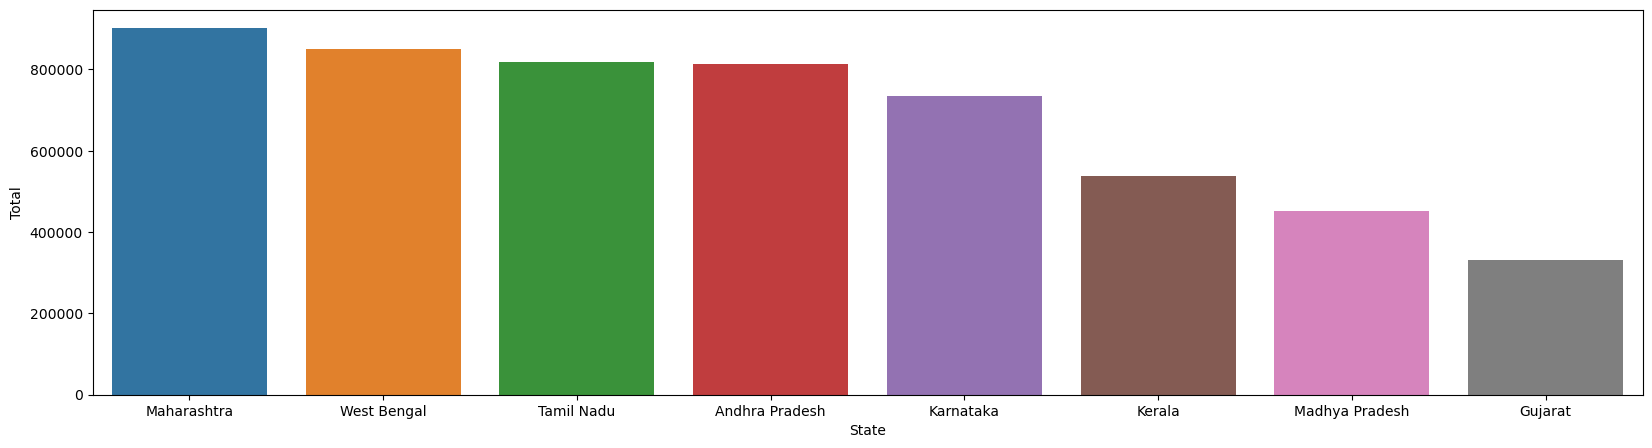

In [8]:
plt.figure(figsize=(20,5))
a=df.groupby('State')['Total'].sum().sort_values(ascending=False)[2:10]
sns.barplot(x=a.index,y=a)

<BarContainer object of 8 artists>

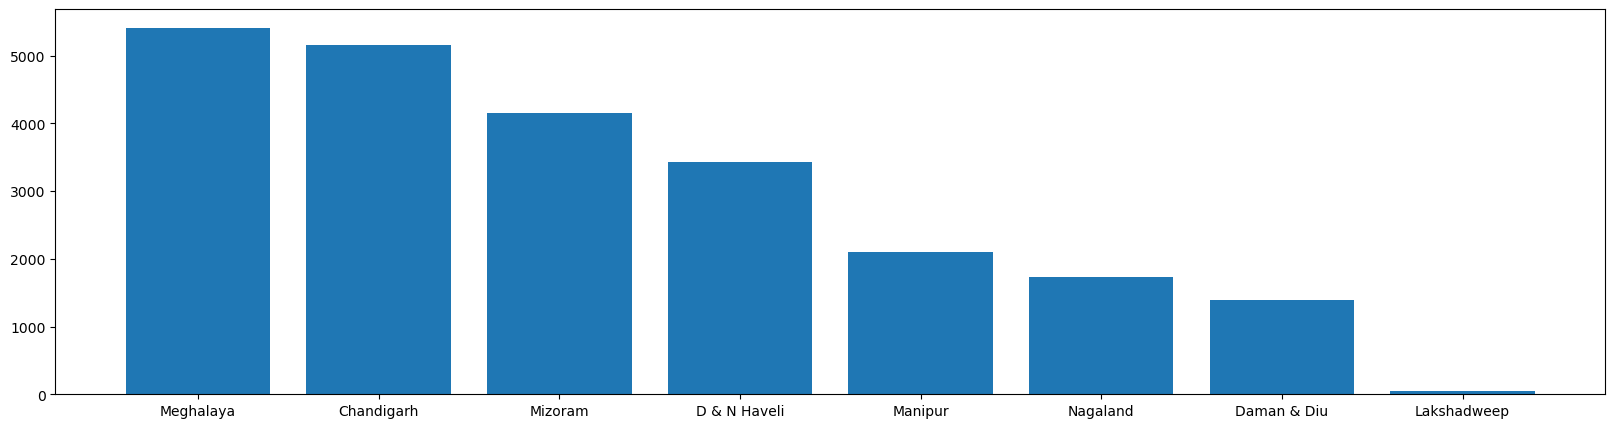

In [9]:
lst=pd.DataFrame(df.groupby('State')['Total'].sum().sort_values(ascending=False))
lst=lst.iloc[30:]
plt.figure(figsize=(20,5))
plt.bar(lst.index,lst['Total'])

In [10]:
df[(df['Type']=='Love Affairs') | (df['Type']=='Suspected/Illicit Relation') | (df['Type']=='Illegitimate Pregnancy')]['Total'].sum()

62444

<Axes: xlabel='Type', ylabel='Total'>

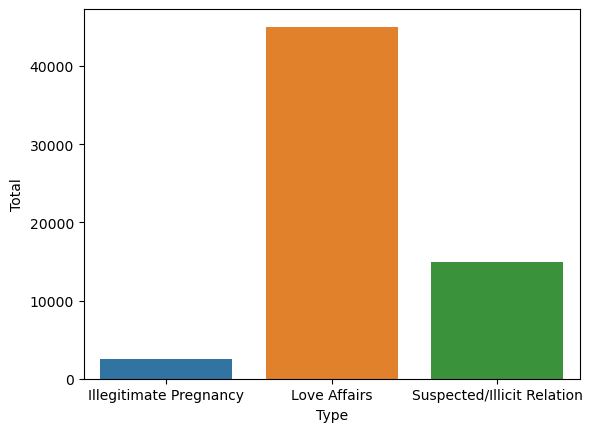

In [11]:
aa=df[(df['Type']=='Love Affairs') | (df['Type']=='Suspected/Illicit Relation') | (df['Type']=='Illegitimate Pregnancy')]
mm=aa[aa['Total']>0]
ss=pd.DataFrame(mm.groupby('Type')['Total'].sum())
sns.barplot(x=ss.index,y=ss['Total'],data=ss)

<Axes: xlabel='Gender', ylabel='Total'>

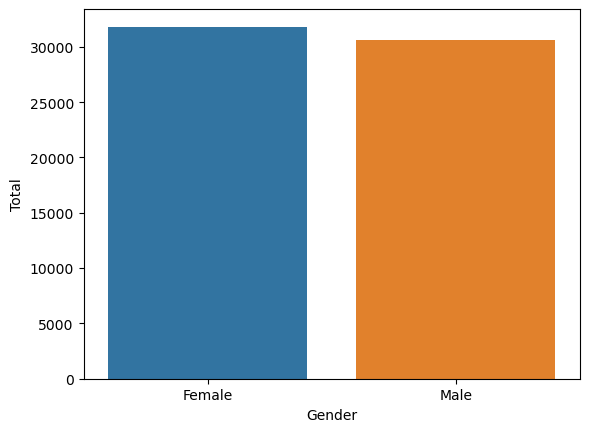

In [12]:
ss=pd.DataFrame(mm.groupby('Gender')['Total'].sum())
sns.barplot(x=ss.index,y=ss['Total'],data=ss)

<Axes: xlabel='Year', ylabel='Total'>

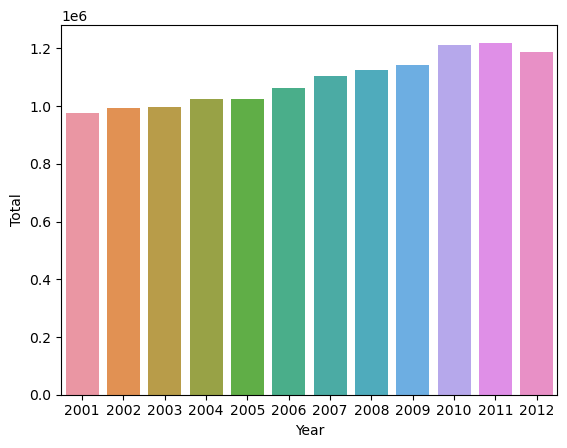

In [13]:
jj=df[df['Total']>0]
bb=pd.DataFrame(jj.groupby('Year')['Total'].sum().sort_values(ascending=False))
sns.barplot(x=bb.index,y=bb['Total'],data=bb)

(0.0, 18.0)

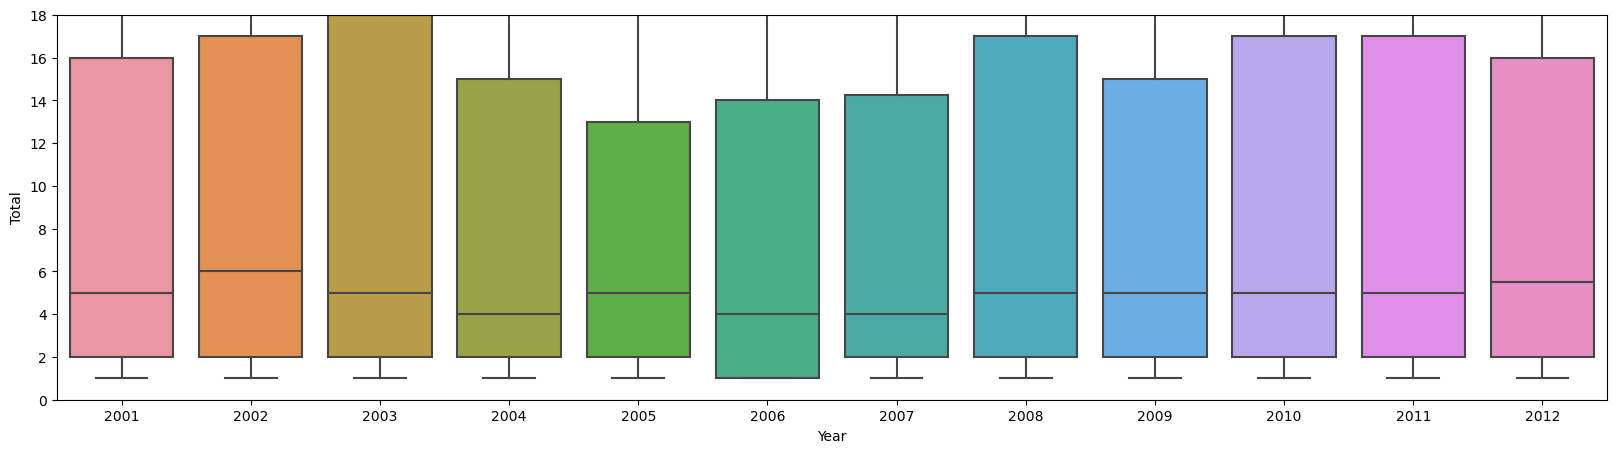

In [14]:
plt.figure(figsize=(20,5))
sns.boxplot(x='Year',y=mm['Total'],data=mm)
plt.ylim(0,18)

<Axes: xlabel='Type', ylabel='Total'>

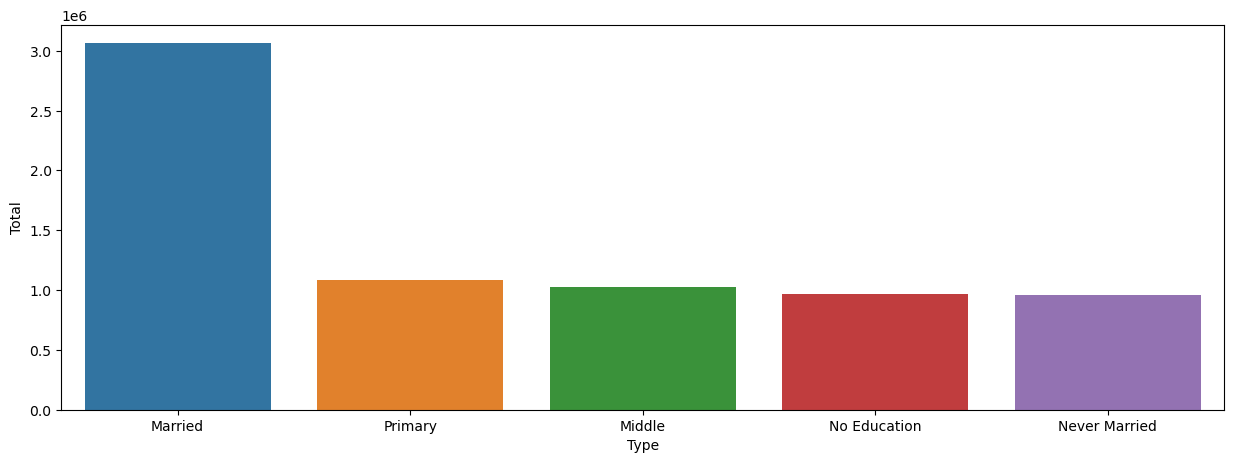

In [15]:
nn=pd.DataFrame(jj.groupby('Type')['Total'].sum().sort_values(ascending=False)[0:5])
plt.figure(figsize=(15,5))
sns.barplot(x=nn.index,y=nn['Total'],data=nn)

Text(0.5, 0, 'Type of Sucide')

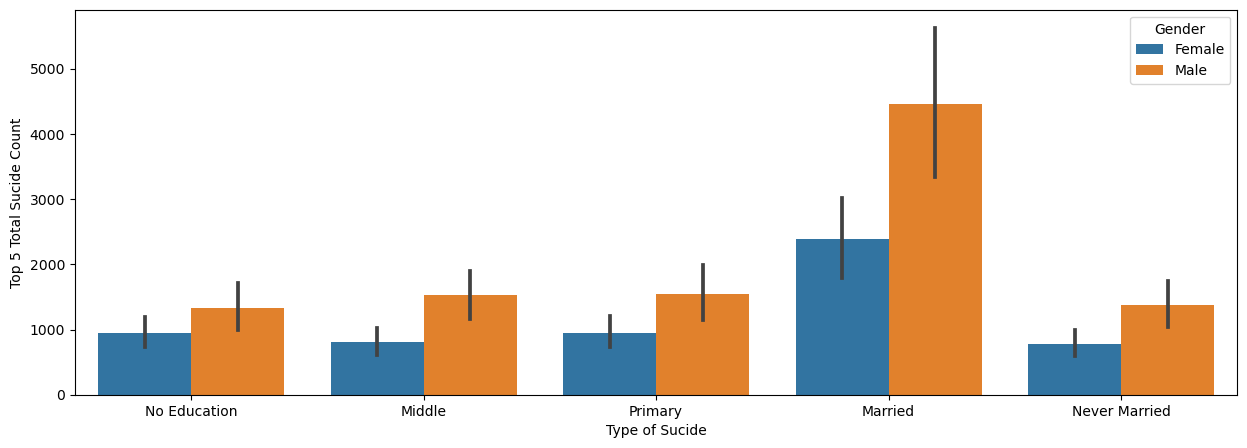

In [16]:
jj.head()
ss=jj[['Type','Gender','Total']]
ss.head()
plt.figure(figsize=(15,5))
sns.barplot(x='Type',y='Total',data=ss[(ss['Type']=='Married') | (ss['Type']=='Primary') | (ss['Type']=='Middle')| (ss['Type']=='No Education') | (ss['Type']=='Never Married')],hue='Gender')
plt.ylabel('Top 5 Total Sucide Count')
plt.xlabel('Type of Sucide')

In [17]:
female=jj[jj['Gender']=='Female']
male=jj[jj['Gender']=='Male']
female.groupby('Type')['Total'].sum().sort_values(ascending=False)[0:10]

Type
Married                                     1070301
Primary                                      409020
No Education                                 398826
Middle                                       353289
Never Married                                346380
House Wife                                   285243
Matriculate/Secondary                        245820
By Hanging                                   148423
Family Problems                              133181
Hr. Secondary/Intermediate/Pre-Universit     118218
Name: Total, dtype: int64

In [19]:
male.groupby('Type')['Total'].sum().sort_values(ascending=False)[0:10]

Type
Married                                     1995021
Primary                                      679461
Middle                                       675624
Never Married                                608523
No Education                                 566445
Matriculate/Secondary                        523878
Others (Please Specify)                      357956
By Hanging                                   312532
Hr. Secondary/Intermediate/Pre-Universit     238506
Family Problems                              208771
Name: Total, dtype: int64

Text(0, 0.5, 'Sucide Count Due to Love Affair')

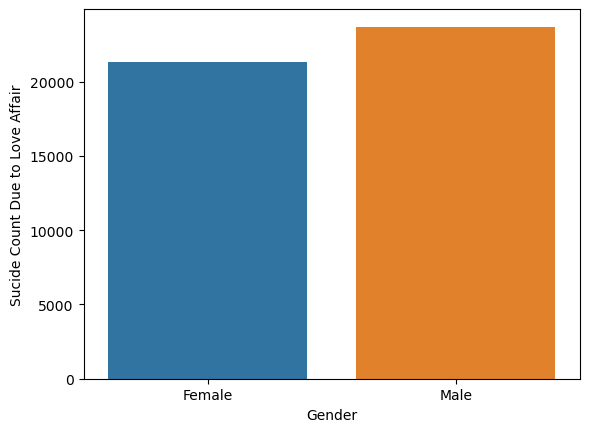

In [20]:
cc=pd.DataFrame(jj[jj['Type']=='Love Affairs'].groupby('Gender')['Total'].sum())
sns.barplot(x=cc.index,y=cc['Total'],data=cc)
plt.ylabel('Sucide Count Due to Love Affair')

In [21]:
stu=jj[jj['Type_code']=='Education_Status']
tot=jj['Total'].sum()  
per=(stu['Total'].sum()/tot)*100
per

33.41402907984511

Text(0.5, 1.0, 'Increment in sucide of students by year')

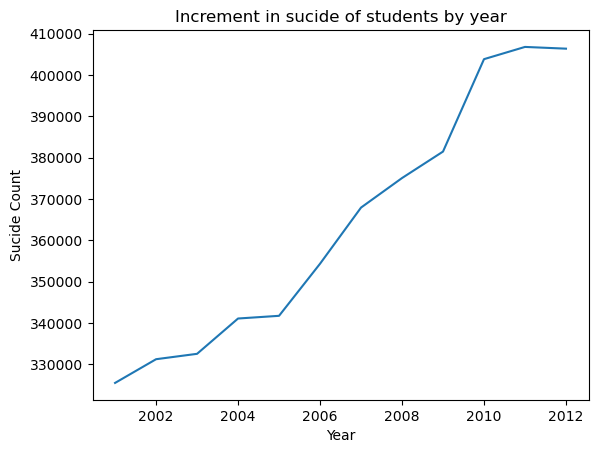

In [22]:
gra=stu.groupby('Year')['Total'].sum()
plt.plot(gra.index,gra.values)
plt.xlabel('Year')
plt.ylabel('Sucide Count')
plt.title('Increment in sucide of students by year')